In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy
from datetime import datetime

In [ ]:
class SharpeOptimisation:
    
    def __init__(self, portfolio: list, start=None, end=None):
        
        self.portfolio = portfolio
        self.df = pd.DataFrame()
        
        self.start = start
        self.end = end
        
        if self.start == None or self.end == None:
            
            date = datetime.now()
            
            self.start = f'{date.year-10}-{date.month}-{date.day}'
            self.end = f'{date.year}-{date.month}-{date.day}'
        
        
        for ticker in self.portfolio:
            download = yf.download(ticker, self.start, self.end)['Close']
            
            self.df = pd.concat([self.df, download], axis=1)
        
        self.df.columns = self.portfolio
        
        
        self.log_ret = np.log(self.df / self.df.shift(1))
        
    
    
    def simulation(self, plot=False):
        
        np.random.seed(101)
        
        num_ports = 15000
        all_weights = np.zeros((num_ports, len(self.portfolio)))
        ret_arr = np.zeros(num_ports)
        vol_arr = np.zeros(num_ports)
        sharpe_arr = np.zeros(num_ports)
        
        for ind in range(num_ports):
    
            weights = np.array(np.random.random(len(self.portfolio)))
            weights = weights / np.sum(weights)

            all_weights[ind, :] = weights

            ret_arr[ind] = np.sum(self.log_ret.mean() * weights * 252)
            vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(self.log_ret.cov()*252, weights)))

            sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
            
        
        max_sr_ret = ret_arr[sharpe_arr.argmax()]
        max_sr_vol = vol_arr[sharpe_arr.argmax()]
        
        if plot:
            
            plt.figure(figsize=(12, 8))
            plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
            plt.colorbar(label='Sharpe Ratio')
            plt.xlabel('Volatility')
            plt.ylabel('Returns')

            plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')
            plt.show()
            
        
        return {'Best Sharpe ratio' : np.round(sharpe_arr.max(), 4),
               'Estimated returns' : np.round(max_sr_ret, 4),
               'Estimated volatility': np.round(max_sr_vol, 4),
               'Weights': np.round(all_weights[sharpe_arr.argmax()], 4)}
        
        
    def __get_ret_vol_sr(self, weights):
        weights = np.array(weights)
        ret = np.sum(log_ret.mean() * weights * 252)
        vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
        sr = ret / vol

        return np.array([ret, vol, sr])
        
    
    
    def __minimize_volatility(weights):
        return get_ret_vol_sr(weights)[1]
        
        
    def optimize_sharpe_ratio(self):
        
        def __neg_sharpe(weights):
            return self.__get_ret_vol_sr(weights)[2] * (-1)

        def __check_sum(weights):

            return np.sum(weights) - 1
        
        cons = ({'type' : 'eq', 'fun' : __check_sum})
        bounds = tuple([(0,1) for _ in range(len(self.portfolio))])
        init_guess = list(np.ones(len(self.portfolio)) / len(self.portfolio))

        opt_results = scipy.optimize.minimize(__neg_sharpe, init_guess, method='SLSQP', 
                       bounds=bounds, constraints=cons)
        
        weights = opt_results.x
        results = self.__get_ret_vol_sr(weights)
        
        return {'Best Sharpe ratio' : np.round(results[2], 4),
               'Estimated returns' : np.round(results[0], 4),
               'Estimated volatility': np.round(results[1], 4),
               'Weights': np.round(weights, 4)}
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


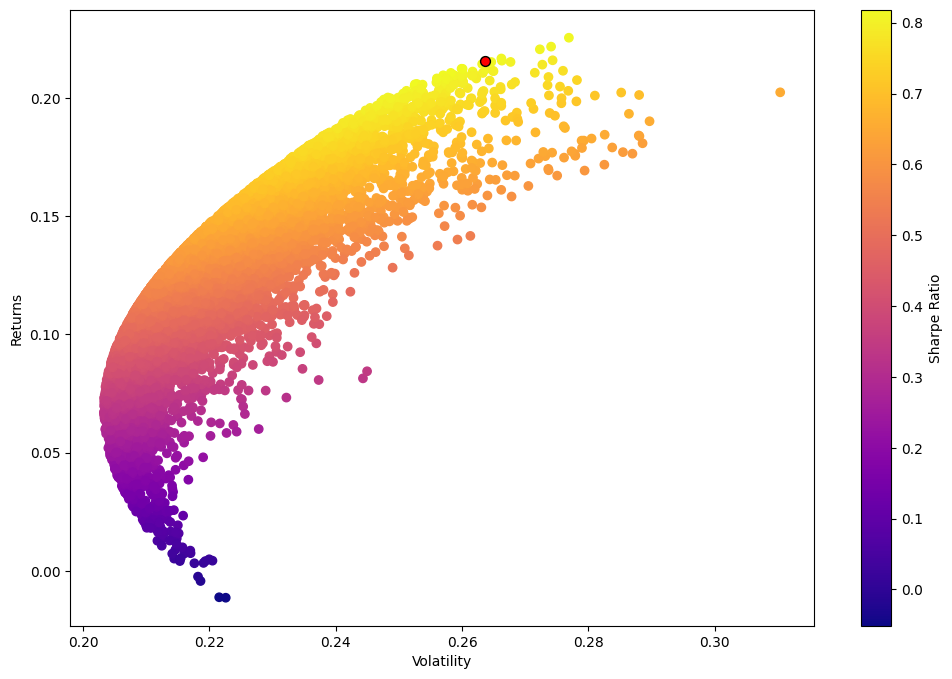

{'Best Sharpe ratio': 0.8183,
 'Estimated returns': 0.2158,
 'Estimated volatility': 0.2637,
 'Weights': array([0.5451, 0.434 , 0.017 , 0.0039])}

In [ ]:
    portfolio = ['AAPL', 'AMZN', 'CSCO', 'IBM']

    test = SharpeOptimisation(portfolio)
    test.simulation(True)